In [70]:

import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
# Calculate silhouette_score
from sklearn.metrics import silhouette_score
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/gdrive')
#Change current working directory to gdrive
%cd /gdrive


Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [71]:
#Read files
trainfile = r'/gdrive/My Drive/CIS508A4/Wholesale customers data.csv'
trainData = pd.read_csv(trainfile) #creates a dataframe

print(trainData.shape)


(440, 8)


In [0]:

X_train = trainData.drop(['Region','Channel'],axis=1)


In [0]:
# normalized_X = preprocessing.normalize(X_train)
# print(normalized_X.shape)
# normalized_X

In [74]:
#K-Means Clustering ========================================================================
#Default Mode - K=8
kmeans = KMeans()
kmeans.fit(X_train)
kmeans.labels_
#kmeans.cluster_centers_
#Print Silhouette measure
print(silhouette_score(X_train, kmeans.labels_))


0.3228515253509095


In [75]:
#Add Cluster Number to each datapoint + save file
df_kmeans=X_train
kmeans_predict_train=kmeans.predict(df_kmeans)
df_kmeans['Cluster Number']=kmeans_predict_train

#df_kmeans.head()
#df_kmeans.dtypes
df = pd.concat([trainData.iloc[:,0:2],df_kmeans],axis=1)
df.to_csv('/gdrive/My Drive/CIS508A4/Default_kmeansProb2.csv')
res1= pd.read_csv('/gdrive/My Drive/CIS508A4/Default_kmeansProb2.csv')
print(res1)


     Unnamed: 0  Channel  Region  ...  Detergents_Paper  Delicassen  Cluster Number
0             0        2       3  ...              2674        1338               1
1             1        2       3  ...              3293        1776               5
2             2        2       3  ...              3516        7844               5
3             3        1       3  ...               507        1788               1
4             4        2       3  ...              1777        5185               1
..          ...      ...     ...  ...               ...         ...             ...
435         435        1       3  ...               182        2204               4
436         436        1       3  ...                93        2346               4
437         437        2       3  ...             14841        1867               0
438         438        1       3  ...               168        2125               7
439         439        1       3  ...               477          52         

In [76]:
c = [[0]*2]*8

for j in range (0,8):
  channel1 = 0
  channel2 = 0
  for i in range (0,440):
    if res1.loc[i,"Cluster Number"] == j:
      if res1.loc[i,"Channel"] == 1:
        channel1 +=1
      elif res1.loc[i,"Channel"] == 2:
        channel2 += 1
    count = [channel1,channel2]
  c[j] = count

print(c)

[[0, 20], [85, 22], [0, 4], [7, 0], [41, 7], [14, 74], [2, 0], [149, 15]]


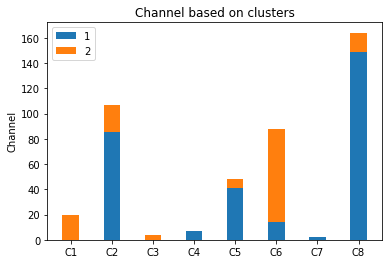

channel1 [0, 85, 0, 7, 41, 14, 2, 149]
channel2 [20, 22, 4, 0, 7, 74, 0, 15]


In [77]:
import matplotlib.pyplot as plt
N=8

channel1=[]
channel2=[]
for i in range (0,8):
  val = c[i][0]
  channel1.append(val)

for j in range (0,8):
  val=c[j][1]
  channel2.append(val)

ind = np.arange(N)
width=0.40

p1 = plt.bar(ind,channel1,width)
p2 = plt.bar(ind,channel2,width,bottom=channel1)

plt.ylabel('Channel')
plt.title('Channel based on clusters')
plt.xticks(ind, ('C1','C2','C3','C4','C5','C6','C7','C8'))
plt.legend((p1[0],p2[0]),('1','2'))
plt.show()
print('channel1',channel1)
print('channel2',channel2)

In [82]:
c = [[0]*3]*8

for j in range (0,8):
  region1 = 0
  region2 = 0
  region3 = 0
  for i in range (0,440):
    if res1.loc[i,"Cluster Number"] == j:
      if res1.loc[i,"Region"] == 1:
        region1 +=1
      elif res1.loc[i,"Region"] == 2:
        region2 += 1
      elif res1.loc[i,"Region"] == 3:
        region3 += 1
    count = [region1,region2,region3]
  c[j] = count

print(c)

[[4, 3, 13], [18, 12, 77], [0, 0, 4], [2, 0, 5], [7, 3, 38], [15, 11, 62], [0, 1, 1], [31, 17, 116]]


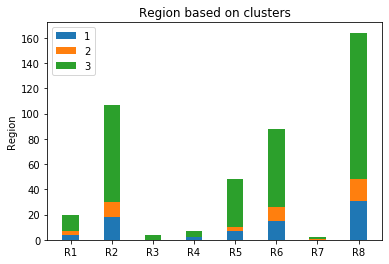

region1 [4, 18, 0, 2, 7, 15, 0, 31]
region2 [3, 12, 0, 0, 3, 11, 1, 17]
region3 [13, 77, 4, 5, 38, 62, 1, 116]


In [88]:
import matplotlib.pyplot as plt
N=8

region1=[]
region2=[]
region3=[]
for i in range (0,8):
  val = c[i][0]
  region1.append(val)

for j in range (0,8):
  val=c[j][1]
  region2.append(val)

for k in range (0,8):
  val=c[k][2]
  region3.append(val)

ind = np.arange(N)
width=0.40

regions = np.add(region1,region2).tolist()
p1 = plt.bar(ind,region1,width)
p2 = plt.bar(ind,region2,width,bottom=region1)
p3 = plt.bar (ind,region3,width,bottom=regions)
plt.ylabel('Region')
plt.title('Region based on clusters')
plt.xticks(ind, ('R1','R2','R3','R4','R5','R6','R7','R8'))
plt.legend((p1[0],p2[0],p3[0]),('1','2','3'))
plt.show()
print('region1',region1)
print('region2',region2)
print('region3',region3)

In [78]:
#K-Means Clustering ========================================================================

kmeans = KMeans(n_clusters=6,init='random',algorithm='elkan')
kmeans.fit(X_train)
kmeans.labels_
#kmeans.cluster_centers_
#print(X_train.shape)
#Print Silhouette measure
print(silhouette_score(X_train, kmeans.labels_))

0.3187562260632558


In [89]:
#Add Cluster Number to each datapoint + save file
df_kmeans=X_train
kmeans_predict_train=kmeans.predict(X_train)

df_kmeans['Cluster Number']=kmeans_predict_train

df = pd.concat([trainData.iloc[:,0:2],df_kmeans],axis=1)
df.to_csv('/gdrive/My Drive/CIS508A4/Hyper_kmeansProb2.csv')
res2= pd.read_csv('/gdrive/My Drive/CIS508A4/Hyper_kmeansProb2.csv')
print(res2)


     Unnamed: 0  Channel  Region  ...  Detergents_Paper  Delicassen  Cluster Number
0             0        2       3  ...              2674        1338               4
1             1        2       3  ...              3293        1776               3
2             2        2       3  ...              3516        7844               3
3             3        1       3  ...               507        1788               4
4             4        2       3  ...              1777        5185               4
..          ...      ...     ...  ...               ...         ...             ...
435         435        1       3  ...               182        2204               5
436         436        1       3  ...                93        2346               5
437         437        2       3  ...             14841        1867               2
438         438        1       3  ...               168        2125               3
439         439        1       3  ...               477          52         

In [99]:
c1 = [[0]*2]*6

for j in range (0,6):
  channel1 = 0
  channel2 = 0
  for i in range (0,440):
    if res2.loc[i,"Cluster Number"] == j:
      if res2.loc[i,"Channel"] == 1:
        channel1 +=1
      elif res2.loc[i,"Channel"] == 2:
        channel2 += 1
    count = [channel1,channel2]
  c1[j] = count

print(c1)



[[0, 7], [8, 0], [7, 72], [154, 32], [90, 25], [39, 6]]


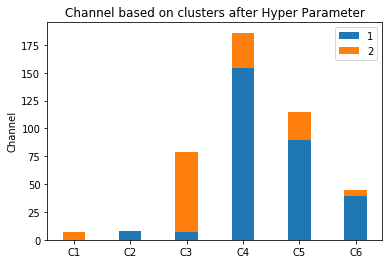

channel1 [0, 8, 7, 154, 90, 39]
channel2 [7, 0, 72, 32, 25, 6]


In [103]:
import matplotlib.pyplot as plt
N=6

channel1=[]
channel2=[]
for i in range (0,6):
  val = c1[i][0]
  channel1.append(val)

for j in range (0,6):
  val=c1[j][1]
  channel2.append(val)

ind = np.arange(N)
width=0.40

p1 = plt.bar(ind,channel1,width)
p2 = plt.bar(ind,channel2,width,bottom=channel1)

plt.ylabel('Channel')
plt.title('Channel based on clusters after Hyper Parameter')
plt.xticks(ind, ('C1','C2','C3','C4','C5','C6'))
plt.legend((p1[0],p2[0]),('1','2'))
plt.show()
print('channel1',channel1)
print('channel2',channel2)

In [98]:
c2 = [[0]*3]*6

for j in range (0,6):
  region1 = 0
  region2 = 0
  region3 = 0
  for i in range (0,440):
    if res2.loc[i,"Cluster Number"] == j:
      if res2.loc[i,"Region"] == 1:
        region1 +=1
      elif res2.loc[i,"Region"] == 2:
        region2 += 1
      elif res2.loc[i,"Region"] == 3:
        region3 += 1
    count = [region1,region2,region3]
  c2[j] = count

print(c2)

[[1, 1, 5], [1, 1, 6], [13, 11, 55], [35, 19, 132], [20, 12, 83], [7, 3, 35]]


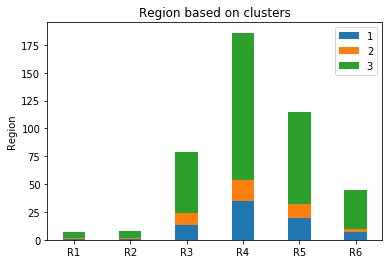

region1 [1, 1, 13, 35, 20, 7]
region2 [1, 1, 11, 19, 12, 3]
region3 [5, 6, 55, 132, 83, 35]


In [102]:
import matplotlib.pyplot as plt
N=6

region1=[]
region2=[]
region3=[]
for i in range (0,6):
  val = c2[i][0]
  region1.append(val)

for j in range (0,6):
  val=c2[j][1]
  region2.append(val)

for k in range (0,6):
  val=c2[k][2]
  region3.append(val)

ind = np.arange(N)
width=0.40

regions = np.add(region1,region2).tolist()
p1 = plt.bar(ind,region1,width)
p2 = plt.bar(ind,region2,width,bottom=region1)
p3 = plt.bar (ind,region3,width,bottom=regions)
plt.ylabel('Region')
plt.title('Region based on clusters')
plt.xticks(ind, ('R1','R2','R3','R4','R5','R6'))
plt.legend((p1[0],p2[0],p3[0]),('1','2','3'))
plt.show()
print('region1',region1)
print('region2',region2)
print('region3',region3)